# naive bayes classifier

#### just workflow
do sprawdzenia dla prowadzacego

In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math

In [14]:
def get_wsp_pozytywnosci(df, find, features):
    p_z_pozytywne = []
    pozytywne = df['decyzja'].value_counts()['tak']
    data = df.loc[df['decyzja'] == 'tak']

    for i in range(len(features)):
        features_count = data[features[i]].value_counts()[find[i]]
        p_z_pozytywne.append(features_count/pozytywne)

    p_z_pozytywne.append(pozytywne/df.shape[0])
    wsp_pozytywnosci = 1
    for p in p_z_pozytywne:
        wsp_pozytywnosci *= p
    return wsp_pozytywnosci


def get_wsp_negatywnosci(df, find, features):
    p_z_negatywne = []
    negatywne = df['decyzja'].value_counts()['nie']
    data = df.loc[df['decyzja'] == 'nie']

    for i in range(len(features)):
        features_count = data[features[i]].value_counts()[find[i]]
        p_z_negatywne.append(features_count/negatywne)

    p_z_negatywne.append(negatywne/df.shape[0])
    wsp_negatywnosci = 1
    for p in p_z_negatywne:
        wsp_negatywnosci *= p
    return wsp_negatywnosci 
    

def get_wsp_szukanego_zdarzenia(df, find, features):
    wspolczynnik_szukanego_zdarzenia_lista = list()
    for i in range(len(features)):
        cocount = df[features[i]].value_counts()[find[i]]
        total = df.shape[0]
        wspolczynnik_szukanego_zdarzenia_lista.append(cocount/total)

    wspolczynnik_szukanego_zdarzenia = 1
    for p in wspolczynnik_szukanego_zdarzenia_lista:
        wspolczynnik_szukanego_zdarzenia *= p
    return wspolczynnik_szukanego_zdarzenia

def get_decyzja(wsp_pozytywne_szukane, wsp_negatywne_szukane):
    if wsp_pozytywne_szukane > wsp_negatywne_szukane:
        return 'tak'
    elif wsp_pozytywne_szukane < wsp_negatywne_szukane:
        return 'nie'
    else:
        return 'trudno powiedziec'

find = ['deszcz','goraco','ok','jest']

df = iris = pd.read_csv('pogoda.csv')
df = df.iloc[:, 1:]

features = df.columns[:-1]
wsp_pozytywnosci = get_wsp_pozytywnosci(df, find, features)
wsp_negatywnosci = get_wsp_negatywnosci(df, find, features)
wsp_szukanego_zdarzenia = get_wsp_szukanego_zdarzenia(df, find, features)
wsp_pozytywne_szukane = wsp_pozytywnosci/wsp_szukanego_zdarzenia
wsp_negatywne_szukane = wsp_negatywnosci / wsp_szukanego_zdarzenia

get_decyzja(wsp_pozytywne_szukane, wsp_negatywne_szukane)

'tak'

In [3]:
# unique in table 
unique_table = set()
for i in range(df.shape[0]):
    row = tuple(df.iloc[i,:-1])
    unique_table.add(row)

# get list of unique features per column    
features_unique = list()
for f in features:
    features_unique.append(tuple(df[f].unique()))
    
import itertools
# get premutations using itertools
all_unique_cobinations = set(list(itertools.product(*features_unique)))

difference = list(all_unique_cobinations.difference(unique_table)) 
difference = [list(x) for x in difference]


### Implementacja

In [18]:
def get_wsp_pozytywnosci(df, find, features):
    p_z_pozytywne = []
    pozytywne = df['decyzja'].value_counts()['tak']
    data = df.loc[df['decyzja'] == 'tak']
    for i in range(len(features)):
        try:
            features_count = data[features[i]].value_counts()[find[i]]
        except:
            features_count = 0 # if there is no such case
        p_z_pozytywne.append(features_count/pozytywne)

    p_z_pozytywne.append(pozytywne/df.shape[0])
    wsp_pozytywnosci = 1
    for p in p_z_pozytywne:
        wsp_pozytywnosci *= p
    return wsp_pozytywnosci


def get_wsp_negatywnosci(df, find, features):
    p_z_negatywne = []
    negatywne = df['decyzja'].value_counts()['nie']
    data = df.loc[df['decyzja'] == 'nie']

    for i in range(len(features)):
        try:
            features_count = data[features[i]].value_counts()[find[i]]
        except:
            features_count = 0 # if there is no such case
        p_z_negatywne.append(features_count/negatywne)

    p_z_negatywne.append(negatywne/df.shape[0])
    wsp_negatywnosci = 1
    for p in p_z_negatywne:
        wsp_negatywnosci *= p
    return wsp_negatywnosci 


def get_wsp_szukanego_zdarzenia(df, find, features):
    wspolczynnik_szukanego_zdarzenia_lista = list()
    for i in range(len(features)):
        cocount = df[features[i]].value_counts()[find[i]]
        total = df.shape[0]
        wspolczynnik_szukanego_zdarzenia_lista.append(cocount/total)

    wspolczynnik_szukanego_zdarzenia = 1
    for p in wspolczynnik_szukanego_zdarzenia_lista:
        wspolczynnik_szukanego_zdarzenia *= p
    return wspolczynnik_szukanego_zdarzenia


def get_decyzja(wsp_pozytywne_szukane, wsp_negatywne_szukane):
    if wsp_pozytywne_szukane > wsp_negatywne_szukane:
        return 'tak'
    elif wsp_pozytywne_szukane < wsp_negatywne_szukane:
        return 'nie'
    else:
        return 'trudno powiedziec'

    
def get_result(find, df, features):
    wsp_pozytywnosci = get_wsp_pozytywnosci(df, find, features)
    wsp_negatywnosci = get_wsp_negatywnosci(df, find, features)
    wsp_szukanego_zdarzenia = get_wsp_szukanego_zdarzenia(df, find, features)
    wsp_pozytywne_szukane = wsp_pozytywnosci/wsp_szukanego_zdarzenia
    wsp_negatywne_szukane = wsp_negatywnosci / wsp_szukanego_zdarzenia
    return get_decyzja(wsp_pozytywne_szukane, wsp_negatywne_szukane)

def get_unique(df, features):
    '''
    returns unique permutations of all features and returns anly those that are not included in the csv file
    '''
    unique_table = set()
    for i in range(df.shape[0]):
        row = tuple(df.iloc[i,:-1])
        unique_table.add(row)
    # get list of unique features per column    
    features_unique = list()
    for f in features:
        features_unique.append(tuple(df[f].unique()))

    import itertools
    # get premutations using itertools
    all_unique_cobinations = set(list(itertools.product(*features_unique)))

    difference = list(all_unique_cobinations.difference(unique_table)) 
    return [list(x) for x in difference]


def classify_unique(df, features,unique):
    '''
    iterates through the list with unique combinations, classifies them and adds them to the DataFrame
    get_result(find, df, features)
    
    'pochmurno'
    
    '''
    for u in unique:
        classified_as = get_result(u, df, features)
        df.loc[len(df.index)] = u + [classified_as]
    
    return df
    
    
df = iris = pd.read_csv('pogoda.csv')
df = df.iloc[:, 1:]
features = df.columns[:-1]
unique = get_unique(df, features) 
df = classify_unique(df, features,unique)

display(df.head(df.shape[0]))


,slonce,temperatura,cisnienie,wiatr,decyzja
0,slonecznie,goraco,wysokie,nie ma,nie
1,slonecznie,goraco,wysokie,jest,nie
2,pochmurno,goraco,wysokie,nie ma,tak
3,deszcz,ok,wysokie,nie ma,tak
4,deszcz,zimno,ok,nie ma,tak
5,deszcz,zimno,ok,jest,nie
6,deszcz,zimno,ok,jest,tak
7,slonecznie,ok,wysokie,nie ma,nie
8,slonecznie,zimno,ok,nie ma,tak
9,deszcz,ok,ok,nie ma,tak


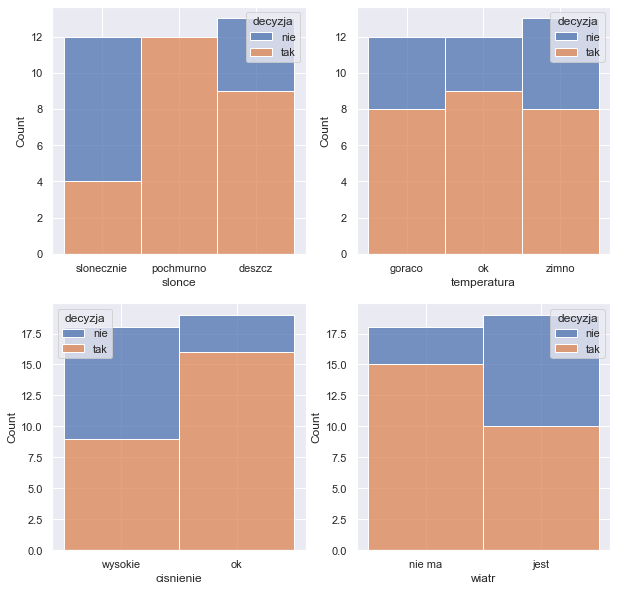

In [46]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, f in enumerate(features):
    row = i//2
    pos = i % 2
    plot =  sns.histplot(data=df, x=f, hue="decyzja", multiple="stack", ax=axs[row][pos])
    

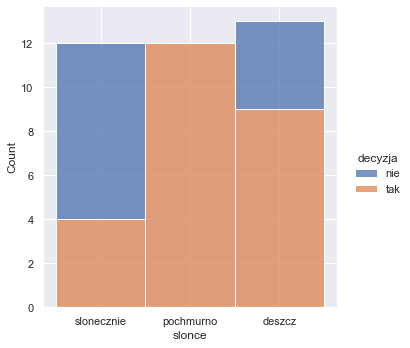

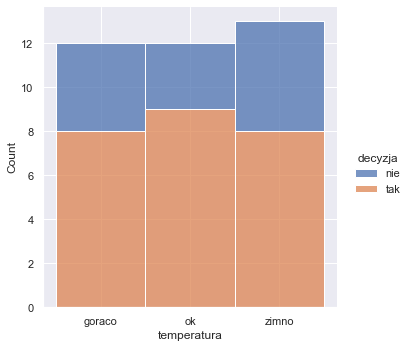

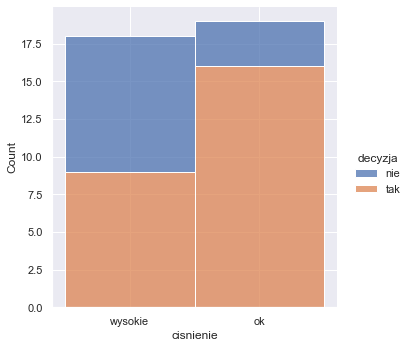

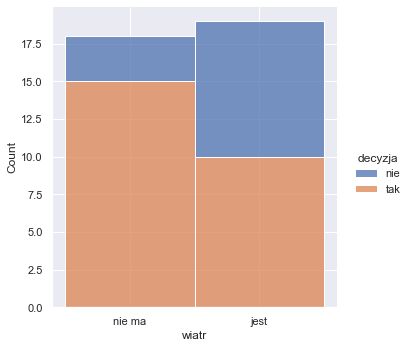

In [44]:
for f in features:
    sns.displot(df, x=f, hue="decyzja", multiple="stack")